In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import itertools
plt.style.use('dark_background')

This notebook has some basic computations of FPP balls with different probability distributions.

In [2]:
def heuristic_distance_search(shape, h_edges, v_edges, distance = None, iters =1000): #I guess it has an O(n^2) worst case performance
    l,w = shape
    ox,oy = shape[0]/2,shape[1]/2
    if distance is None:
        distance = np.zeros(shape)+1E5
        distance[ox,oy]=0
    lastm = 1E10
    for k in range(iters):
        for i in range(max(ox,oy)+1):
            for direct in (-1,1): 
                for neigh in(-1,1):
                    #check for x-axis neighbor
                    try: # Instead of just handling nasty boundary floating cases, just add try-block.
                        p = ox+i*direct
                        n = p+neigh
                        distance[p,:] = np.minimum(distance[p,:], distance[n,:]+h_edges[min(n,p),:])
                    except:
                        pass
                    #check for y-axis neigh
                    try: # Instead of just handling nasty boundary floating cases, just add try-block.
                        p = oy+i*direct
                        n = p+neigh
                        distance[:,p] = np.minimum(distance[:,p], distance[:,n]+v_edges[:,min(n,p)])
                    except:
                        pass
                    
        if lastm == np.mean(distance):
            break
        else:
            lastm = np.mean(distance)
            
        if k%25==0:
            print np.mean(distance),
    return distance
#note how techincally this returns the lagrest lip1 function that is smaller than the 'distance' function parameter. 
#It's not its intended usage but you never know.. 

In [3]:
SIDE = 2001
SHAPE = (SIDE,SIDE)
orig = tuple(x/2 for x in SHAPE)
RANDOM_FUNCTION = lambda size : np.random.exponential(size=SHAPE)
h_edges_dist = RANDOM_FUNCTION(size = (SHAPE[0]-1, SHAPE[1]  ))
v_edges_dist = RANDOM_FUNCTION(size = (SHAPE[0]  , SHAPE[1]-1))
h_dist = 1E3*np.ones(shape=SHAPE)
distances = np.zeros(SHAPE)+1E5
distances[orig]=0

In [4]:
distances = heuristic_distance_search(SHAPE, h_edges_dist, v_edges_dist,distance=distances,iters = 400)

1004.8455621119311 589.1084012031431 497.7645581326576 446.0063510011428 411.35677698495755 386.7115801132741 368.62999574299226 355.0812250902282 344.8514404713004 337.188552573343 331.5718414886844 327.54162175429155 324.67777202069135 322.6839220431804 321.3477462534425 320.49610635905333


In [5]:
x,y = np.meshgrid(*[np.linspace(-1,1,SIDE)]*2)
r = (x**2+y**2)**.5
theta = np.arctan2(x,y)
mask = (r>.1) & (r<.9)

(-0.5, 2000.5, 2000.5, -0.5)

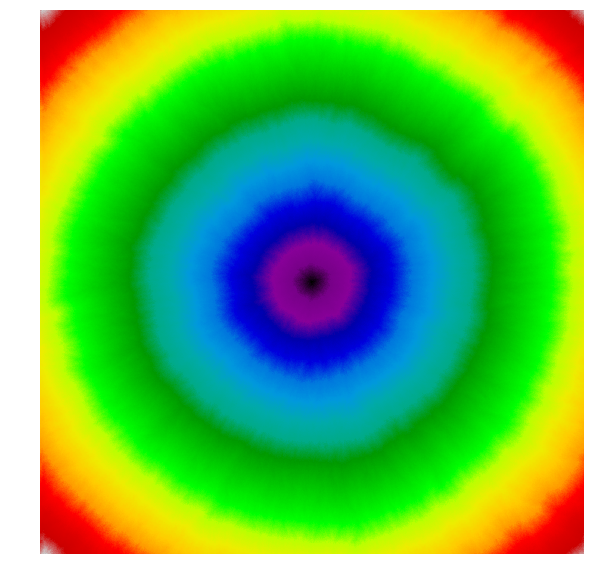

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(distances,cmap='nipy_spectral')
plt.axis('off')